In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import re

## Criação dos modelos:

### Modelo implementado com 5 tipos de distância. A distância padrão, de Hamming, de Jaccard, de Manhattan e de Chebyshev. O algoritmo obtem o resultado de todas as distâncias e retorna o melhor valor obtido. Existem duas distâncias que funcionam mesmo quando os dados contêm strings, Hamming e Jaccard, então, por isso, nós decidimos implementar dentro do algoritmo um Label Encoder para que conseguissemos dar os dados com strings, realizar os testes para essas distâncias e depois usar o Label encoder para colocar tudo em números, podendo assim realizar os testes com as restantes distâncias

In [2]:
from math import sqrt
import pandas as pd
modelos = ["KNNHamming","KNNJaccard","KNN","KNNManhattan","KNNChebyshev"]
resultado={}


class KNN():
    def __init__(self, k):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train
        
    def distance(self, sample1, sample2,modelo):
        if modelo=="KNN":
            distance = 0.0
            for i in range(len(sample1)):
                distance += (sample1[i] - sample2[i]) ** 2
            return sqrt(distance)
        elif modelo=="KNNManhattan":
            distance = 0.0
            for i in range(len(sample1)):
                distance += abs(sample1[i] - sample2[i]) 
            return distance
        elif modelo=="KNNHamming":
            distance = sum(1 for i in range(len(sample1)) if sample1[i] != sample2[i])
            return distance
        elif modelo=="KNNJaccard":
            set1 = set(sample1)
            set2 = set(sample2)
            intersection = len(set1.intersection(set2))
            union = len(set1.union(set2))
            distance = 1 - (intersection / union)
            return distance
        elif modelo=="KNNChebyshev":
            distance = max(abs(x - y) for x, y in zip(sample1, sample2))
            return distance
        
    
    def nearest_neighbors(self, test_sample,  modelo):
        distances = []
        for i in range(len(self.x_train)):
            x_train_sample = self.x_train.iloc[i].values
            distance = self.distance(x_train_sample, test_sample,modelo)
            distances.append((self.y_train[i], distance))
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for i in range(self.k):
            neighbors.append(distances[i][0])
        return neighbors
    
    def predict(self, test_set,y_test):
        count=0
        flag=0
        selected_columns=[]
        for modelo in modelos:
            predictions = []
            if count==2:
                # Concatenar X_train e X_test
                X_combined = pd.concat([self.x_train, test_set], axis=0)
                for column in X_combined.columns:
                    if X.dtypes[column].name=="object":
                        flag=1
                        selected_columns.append(column)
                if flag==1:
                    for column in selected_columns:
                        le = LabelEncoder()
                        X_combined[column] = le.fit_transform(X_combined[column])
                    X_train_encoded = X_combined[:len(self.x_train)]
                    X_test_encoded = X_combined[len(self.x_train):]
                    self.fit(X_train_encoded,self.y_train)
                    test_set=X_test_encoded
            count+=1
            for i in range(len(test_set)):
                test_sample = test_set.iloc[i].values
                neighbors = self.nearest_neighbors(test_sample,modelo)
                labels = [sample for sample in neighbors]
                prediction = max(labels, key=labels.count)
                predictions.append(prediction)
            score=accuracy_score(y_test,predictions)
            resultado[modelo]=score
        maior_resultado = max(resultado.items(), key=lambda x: x[1])
        return maior_resultado[1]

### Inciar o MINMAXScaler que vai ser usado no ultimo dataset para colocar todos os valores numéricos com a mesma escala.

In [3]:
scaler = MinMaxScaler()

### Função para escolher o melhor valor de K em cada algoritmo
#### Função que executa o algoritmo várias vezes com valores de k diferentes e adiciona os resultados a uma lista devolvendo no final o k que obteve melhor prestação. K esse que nós vamos usar quando corrermos o algoritmo garantindo assim que para além de usarmos a melhor distância para os dados em questão vamos tambem usar o melhor k dentro do range de K'as que definirmos para testar

In [4]:
def find_best_k(X_train, X_test, y_train, y_test):
    # Testando diferentes valores de K
    Ks = [1,2,3,4,5,6,7]
    accs = []
    for k in Ks:
        KNNteste=KNN(k)
        KNNteste.fit(X_train,y_train)
        a=KNNteste.predict(X_test,y_test)
        accs.append(a)
    # Encontrando o melhor valor de K
    best_k = Ks[accs.index(max(accs))]
    return best_k

## Tratamento dos dados e teste dos modelos.
### DATASET 1 - Letras - Dados numéricos 

In [5]:
dataset = pd.read_csv('letter.csv')

In [6]:
dataset.head()

,id,'x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx','class'
0,1,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,2,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,3,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H
4,5,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,H


### Limitamos as entradas a 1000 colunas para diminuir o tempo de execução, podendo isso ser alterado.

In [7]:
X = dataset.iloc[1:1000, 1:-1]
y = dataset.iloc[1:1000, -1].values


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### MODELO

In [9]:
k=find_best_k(X_train, X_test, y_train, y_test)

In [10]:
KNN1=KNN(k) #our model
KNN1.fit(X_train,y_train)
Score=KNN1.predict(X_test,y_test)
Score

0.7466666666666667

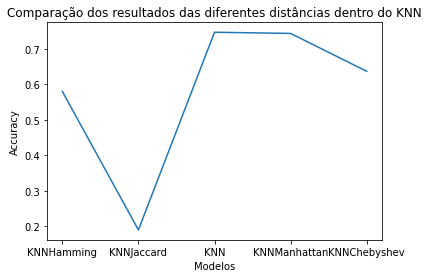

In [11]:
resultados_lista = list(resultado.values())
plt.plot(resultados_lista)
plt.xlabel("Modelos")
plt.ylabel("Accuracy")
plt.title("Comparação dos resultados das diferentes distâncias dentro do KNN")
plt.xticks(range(len(resultados_lista)), modelos, rotation='horizontal')
plt.show()

### A distância de Hamming é uma medida de distância usada para dados categóricos binários e a distância de Jaccard é usada para dados categóricos multivalor. Essas medidas de distância podem ser úteis para problemas de classificação que envolvem variáveis categóricas.

### Como não é este o caso estas duas medidas obtiveram scores piores quando comparadas às outras.

### Por outro lado as outras três distâncias consideram as diferenças entre os valores das variáveis em diferentes dimensões, permitindo que o algoritmo KNN identifique vizinhos mais próximos com base nas características numéricas.

### Dataset 2 -  Tic Tac Toe - atributos categóricos binomiais

In [12]:
dataset = pd.read_csv('tic-tac-toe.csv')

In [13]:
dataset.head()

,id,'top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','Class'
0,1,x,x,x,x,o,o,x,o,o,positive
1,2,x,x,x,x,o,o,o,x,o,positive
2,3,x,x,x,x,o,o,o,o,x,positive
3,4,x,x,x,x,o,o,o,b,b,positive
4,5,x,x,x,x,o,o,b,o,b,positive


In [14]:
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## Modelo


In [16]:
k=find_best_k(X_train, X_test,y_train, y_test)

In [17]:
KNN2=KNN(k) #our model
KNN2.fit(X_train,y_train)
Score2=KNN2.predict(X_test,y_test)
Score2

0.9305555555555556

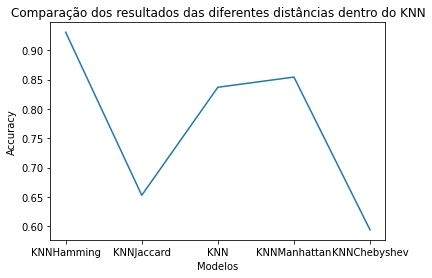

In [18]:
resultados_lista = list(resultado.values())
plt.plot(resultados_lista)
plt.xlabel("Modelos")
plt.ylabel("Accuracy")
plt.title("Comparação dos resultados das diferentes distâncias dentro do KNN")
plt.xticks(range(len(resultados_lista)), modelos, rotation='horizontal')
plt.show()

### Como se tratam de variáveis categóricas binárias, o Hamming é a melhor métrica para este caso.

### Por outro lado a distância de Chebyshev e a de Jaccard obtiveram maus resultados,a primeira porque mede a maior diferença entre os valores correspondentes das variáveis, pressupõe que as variáveis são contínuas e podem variar numa escala numérica. Isso não se aplica a dados categóricos binários, onde os valores estão limitados a duas categorias (0 ou 1). A segunda porque não leva em consideração a frequência relativa dos elementos em cada conjunto. Em dados categóricos binários, onde a frequência dos elementos é importante, a distância de Jaccard pode não capturar as diferenças entre os conjuntos de forma adequada.


### Dataset 3 -  risco de créditos  - vários tipos de dados

In [19]:
dataset = pd.read_csv('csv_result-dataset_31_credit-g.csv')
dataset.head()

,id,'checking_status','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status',...,'property_magnitude','age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class'
0,1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [20]:
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### MINMAX Scaler para os valores numéricos ficarem todos na mesma escala 

In [21]:
X_train_scaled = X_train.copy()
X_test_scaled=X_test.copy()

selected_columns = []
for column in dataset.columns:
    if not column in ['id',"'checking_status'", "'credit_history'",
       "'purpose'",  "'savings_status'", "'employment'",
        "'personal_status'", "'other_parties'",
        "'property_magnitude'", 
       "'other_payment_plans'", "'housing'",  "'job'",
        "'own_telephone'", "'foreign_worker'", "'class'"]:
        selected_columns.append(column)


X_train_scaled[selected_columns] = scaler.fit_transform(X_train[selected_columns])

X_test_scaled[selected_columns] = scaler.transform(X_test[selected_columns])

## Modelo

In [22]:
k=find_best_k(X_train_scaled, X_test_scaled, y_train, y_test)

In [23]:
KNN2=KNN(k) #our model
KNN2.fit(X_train_scaled,y_train)
Score3=KNN2.predict(X_test_scaled,y_test)
Score3

0.7433333333333333

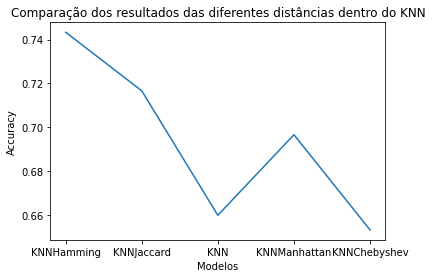

In [24]:
resultados_lista = list(resultado.values())
plt.plot(resultados_lista)
plt.xlabel("Modelos")
plt.ylabel("Accuracy")
plt.title("Comparação dos resultados das diferentes distâncias dentro do KNN")
plt.xticks(range(len(resultados_lista)), modelos, rotation='horizontal')
plt.show()

### Neste caso o dataset tem uma mistura de dados categóricos e numéricos sendo a maioria categóricos e multivalor, o que leva a que a métrica de Jaccard seja uma das superiores.

### Por outro lado a distância euclideana, de Manhattan e de Chebyshev obtiveram maus resultados porque não levam em consideração a estrutura específica dos dados categóricos, como a presença ou ausência de determinadas categorias. Elas são sensíveis apenas às diferenças numéricas entre as variáveis.

## Conclusões

### Após implementar o algoritmo com as alterações propostas em três conjuntos de dados bastante distintos, verificamos que o método euclidiano de calcular   distâncias (método padrão) teve um bom desempenho não só em dados numéricos, como também em dados categóricos.
 
### Porém, em dois dos três casos, verificamos que o maior valor de precisão não surgiu do método padrão, mas sim de um dos métodos implementados. 

### Assim, provamos que é uma vantagem utilizar o algoritmo KNN com vários métodos de distância implementados, uma vez que nos permite obter um melhor desempenho.

